In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Example: Portfolio Evaluation

Suppose we have a portfolio with $n_1$ units of asset 1 and $n_2$ units of asset 2.  The values of these assets are given by

$$X\sim GBM(\mu_1, \sigma_1) \:\textrm{ and }\: Y\sim GBM(\mu_2, \sigma_2)$$

The value of our portfolio at time $t$ is given by the random variable

$$V_t = n_1X_t + n_2Y_t$$

Let's estimate the probability that the portfolio drops in value by at least 10\%.  That is, we want to estimate

$$\mathbb{P}\left[\frac{V_T}{V_0} \leq 0.9\right]$$

For simplicity, let's assume that $X_0$ and $Y_0$ are known constants.

We can solve this problem by simulating the values of each asset up until time $T$ many times, then finding the frequency of simulations where $V_T/V_0 \leq 0.9$.  (To phrase this in a more traditional Monte Carlo framework, we can define the function

$$1_{L}(v) = \left\{ \begin{array}{cc} 1 & v_T \leq 0.9 \\ 0 & \textrm{otherwise} \end{array} \right.$$

and use Monte Carlo simulation to estimate $\mathbb{E}\left[V\right]$.)

### Case I: Independent Assets

Let's first simulate our portfolio with independent assets.  There is not much more math to be done here.  It's worth noting that we only need to know the value of our portfolio at $t=0$ and $t = T$, so we don't need to simulate the full path in between.

Initial value = 1800
Expected terminal value = 1917.7628426157999
Expected return = 0.06542380145322235
Probability of losing at least 10% = 0.220621


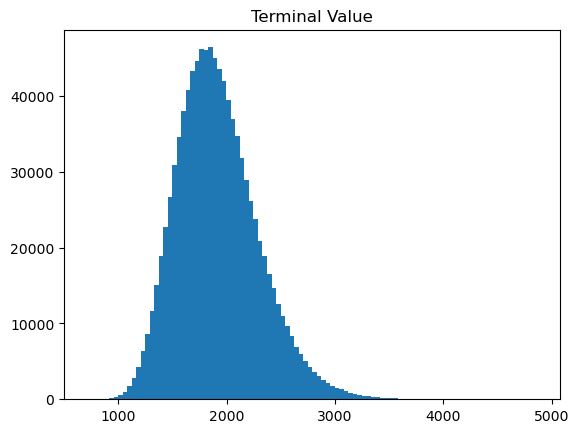

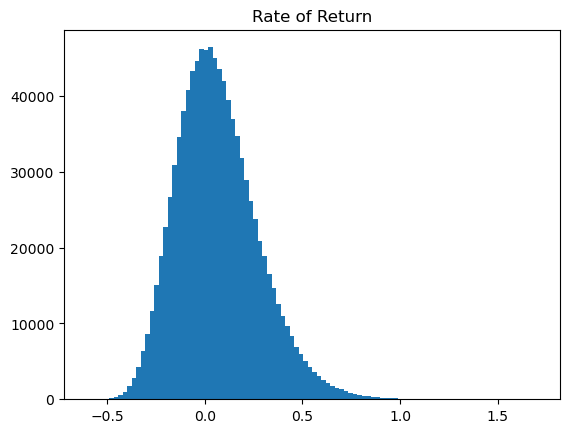

In [2]:
n = 1000000

T = 1
n1, n2 = 10, 10
x0, y0 = 100, 80
mu1, mu2 = 0.05, 0.08
sigma1, sigma2 = 0.25, 0.3

initial_value = n1 * x0 + n2 * y0
terminal_values = np.zeros(n)

for k in range(n):
    z = np.random.randn(2)
    x_increment = (mu1 - sigma1 ** 2 / 2) * T + sigma1 * np.sqrt(T) * z[0]
    y_increment = (mu2 - sigma2 ** 2 / 2) * T + sigma2 * np.sqrt(T) * z[1]
    xT = x0 * np.exp(x_increment)
    yT = y0 * np.exp(y_increment)
    terminal_values[k] = n1 * xT + n2 * yT

rate_of_return = terminal_values / initial_value - 1

loss_probability = np.sum(terminal_values < 0.9 * initial_value) / n

print("Initial value = {}".format(initial_value))
print("Expected terminal value = {}".format(np.mean(terminal_values)))
print("Expected return = {}".format(np.mean(rate_of_return)))
print("Probability of losing at least 10% = {}".format(loss_probability))
plt.hist(terminal_values, 100)
plt.title("Terminal Value")
plt.show()
plt.hist(rate_of_return, 100)
plt.title("Rate of Return")
plt.show()

### Case II: Correlated Assets

Now suppose that the two assets are correlated with some (known) covariance matrix

$$\Sigma = \begin{pmatrix} \sigma_1^2 & \rho\sigma_1\sigma_2 \\ \rho\sigma_1\sigma_2 & \sigma_2^2 \end{pmatrix}$$

We can use almost the same simulation code, but when we generate our random increments, we need to make them correlated (for instance, by using the cholesky decomposition method).

Initial value = 1800
Expected terminal value = 1917.5321293377376
Expected return = 0.06529562740985419
Probability of losing at least 10% = 0.276435


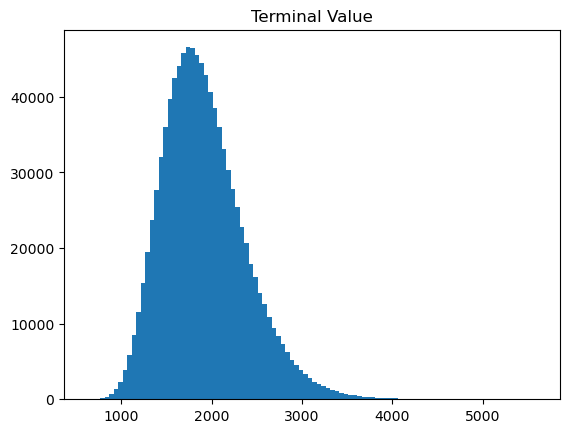

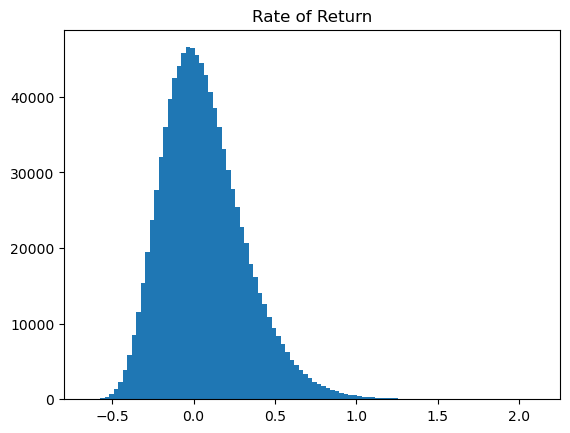

In [3]:
n = 1000000

T = 1
n1, n2 = 10, 10
x0, y0 = 100, 80
mu1, mu2 = 0.05, 0.08
sigma1, sigma2 = 0.25, 0.3
rho = 0.5
Sigma = np.array([[sigma1 ** 2, rho * sigma1 * sigma2], [rho * sigma1 * sigma2, sigma2 ** 2]])
A = np.linalg.cholesky(Sigma)

initial_value = n1 * x0 + n2 * y0
terminal_values = np.zeros(n)

for k in range(n):
    z = np.random.randn(2).reshape((2, 1))
    z = (A @ z).reshape(2)
    x_increment = (mu1 - sigma1 ** 2 / 2) * T + np.sqrt(T) * z[0]
    y_increment = (mu2 - sigma2 ** 2 / 2) * T + np.sqrt(T) * z[1]
    xT = x0 * np.exp(x_increment)
    yT = y0 * np.exp(y_increment)
    terminal_values[k] = n1 * xT + n2 * yT

rate_of_return = terminal_values / initial_value - 1

loss_probability = np.sum(terminal_values < 0.9 * initial_value) / n

print("Initial value = {}".format(initial_value))
print("Expected terminal value = {}".format(np.mean(terminal_values)))
print("Expected return = {}".format(np.mean(rate_of_return)))
print("Probability of losing at least 10% = {}".format(loss_probability))
plt.hist(terminal_values, 100)
plt.title("Terminal Value")
plt.show()
plt.hist(rate_of_return, 100)
plt.title("Rate of Return")
plt.show()